In [510]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [511]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [512]:
data = pd.read_csv('/content/StudentsPerformance randomval (1).csv')
print(data.shape)

(1000, 9)


In [513]:
data.head()

,gender,race/ethnicity,parental level of education,sports,test preparation course,math score,reading score,writing score,attendance
0,female,group B,bachelor's degree,1,none,72,72,74,71
1,female,group C,some college,1,completed,69,90,88,80
2,female,group B,master's degree,1,none,90,95,93,85
3,male,group A,associate's degree,2,none,47,57,44,18
4,male,group C,some college,1,none,76,78,75,66


In [514]:
data.describe()

,sports,math score,reading score,writing score,attendance
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1.355000,66.08900,69.169000,68.054000,67.597000
std,0.478753,15.16308,14.600192,15.195657,15.750513
min,1.000000,0.00000,17.000000,10.000000,18.000000
25%,1.000000,57.00000,59.000000,57.750000,57.000000
50%,1.000000,66.00000,70.000000,69.000000,68.000000
75%,2.000000,77.00000,79.000000,79.000000,79.250000
max,2.000000,100.00000,100.000000,100.000000,95.000000


In [515]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
test preparation course        2
dtype: int64

In [516]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
sports                         0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
attendance                     0.0
dtype: float64


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29321c0fd0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f293210bb10>,
       dtype=object)]

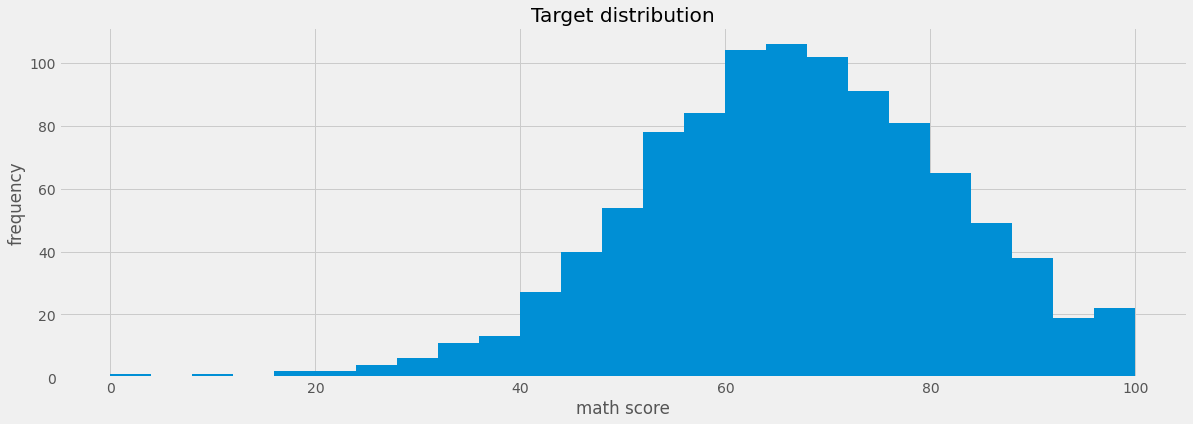

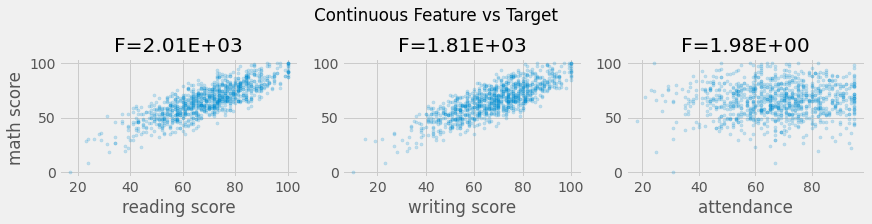

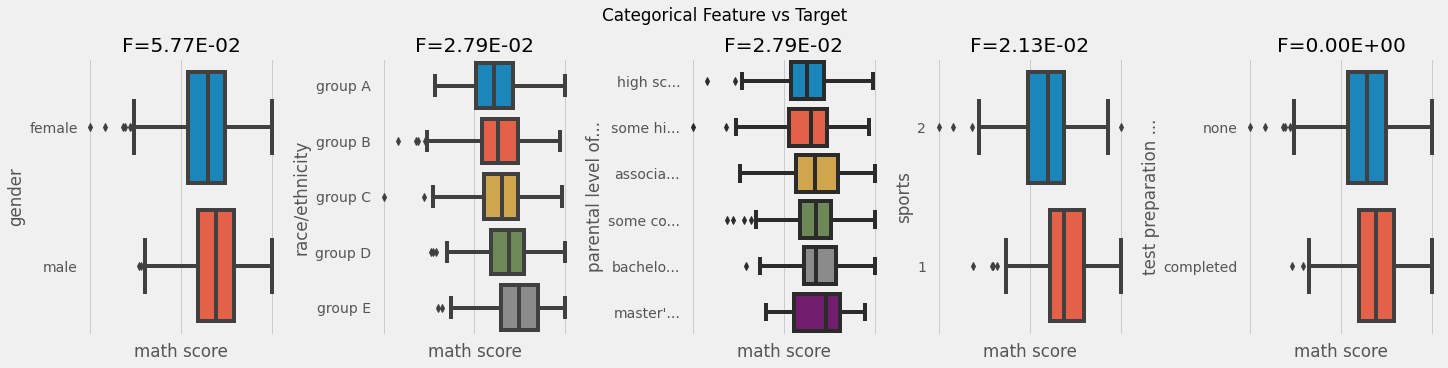

In [517]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2931d06790>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2931c4ee90>,
       dtype=object)]

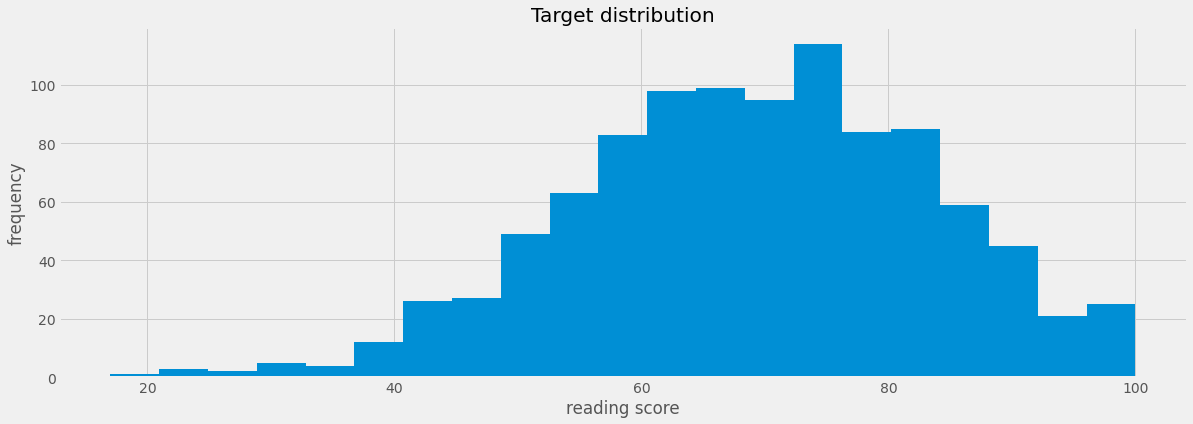

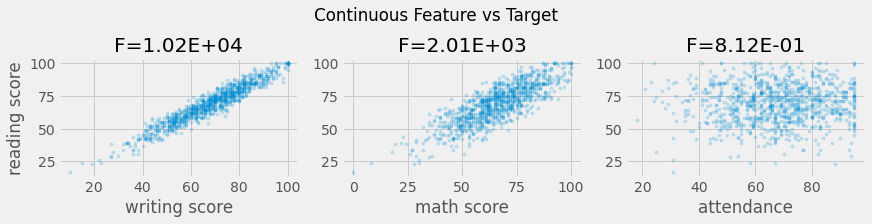

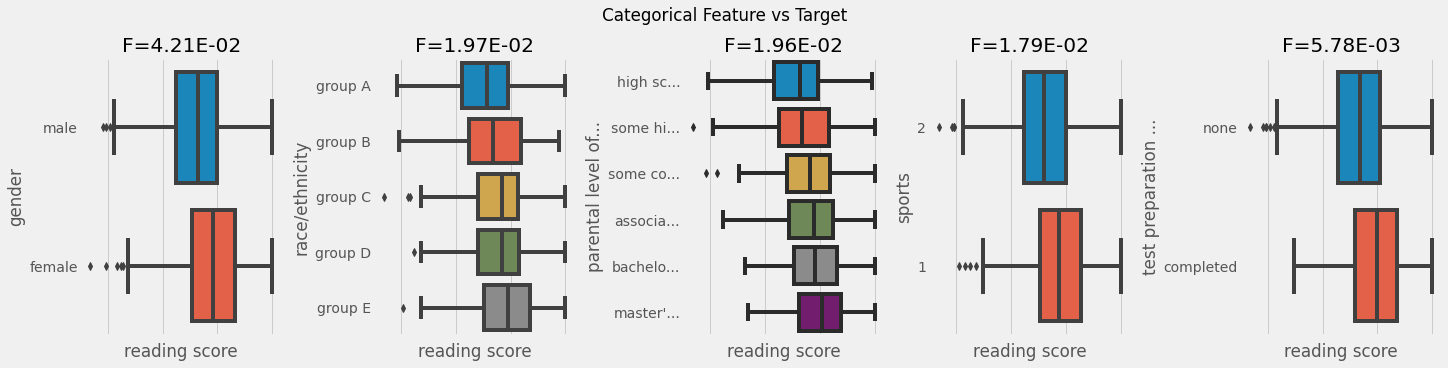

In [518]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

In [519]:
data[['sports','gender','math score','writing score',
      'reading score']].groupby(['sports','gender']).agg('median')

math score  writing score  reading score
sports gender                                          
1      female        67.0           76.0           75.0
       male          72.0           67.0           67.5
2      female        57.0           68.0           67.0
       male          62.0           59.0           61.0

In [520]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

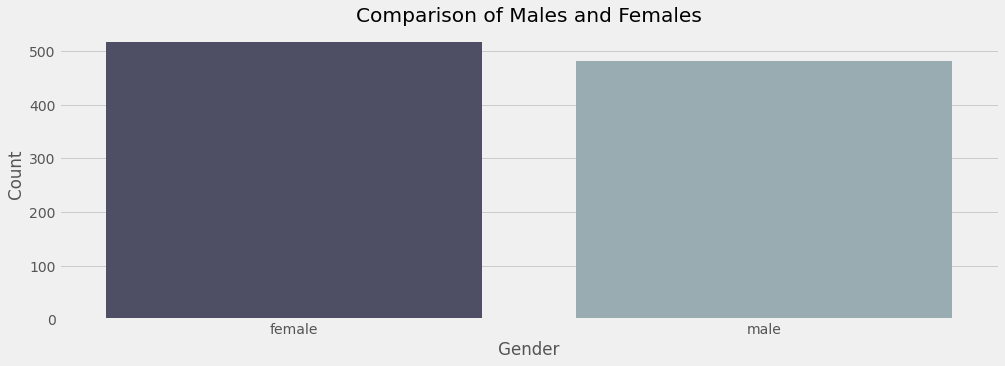

In [521]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

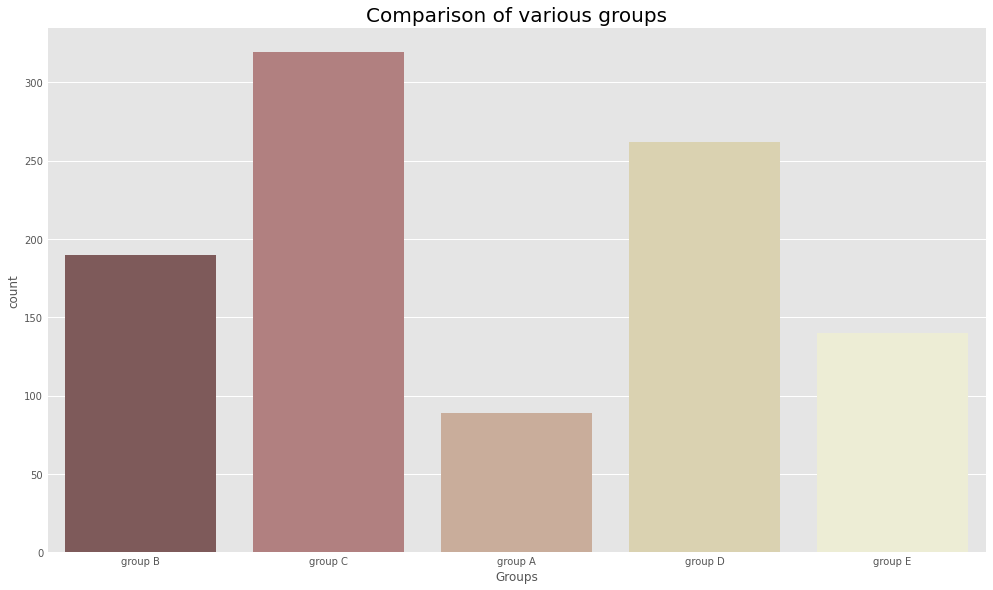

In [522]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

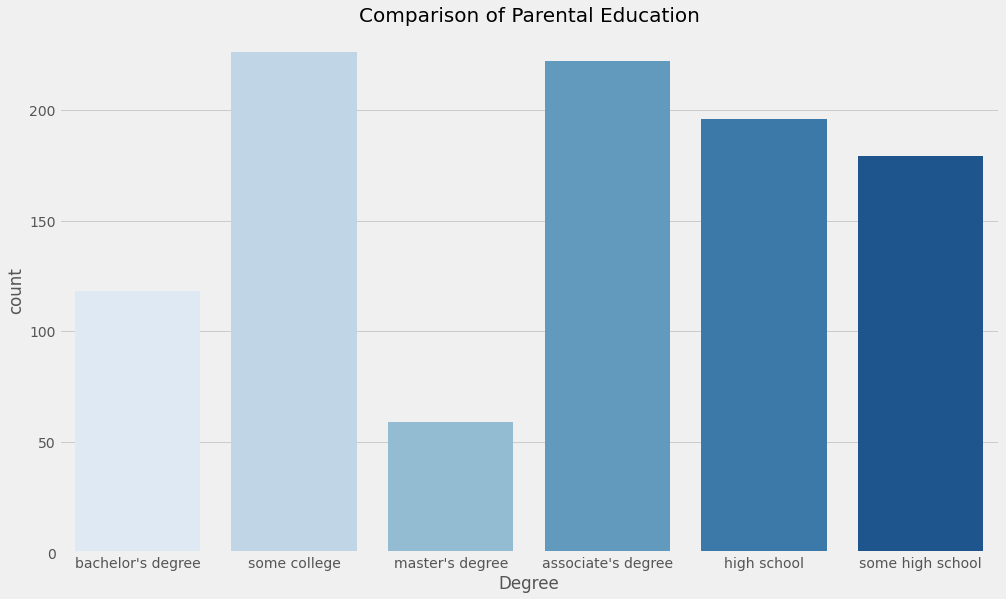

In [523]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

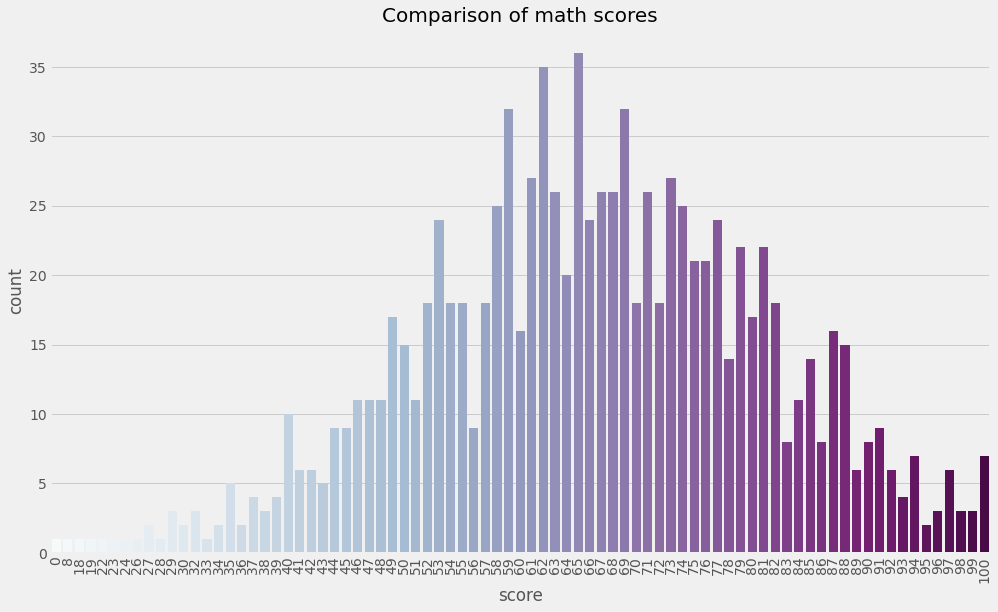

In [524]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

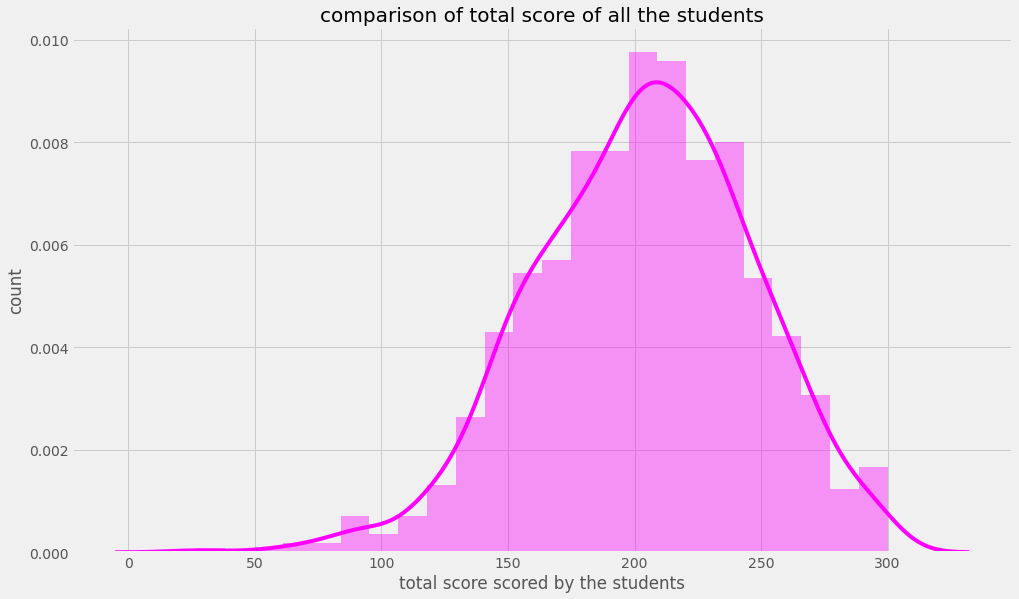

In [525]:
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

In [526]:
data.head()

,gender,race/ethnicity,parental level of education,sports,test preparation course,math score,reading score,writing score,attendance,total_score
0,female,group B,bachelor's degree,1,none,72,72,74,71,218
1,female,group C,some college,1,completed,69,90,88,80,247
2,female,group B,master's degree,1,none,90,95,93,85,278
3,male,group A,associate's degree,2,none,47,57,44,18,148
4,male,group C,some college,1,none,76,78,75,66,229


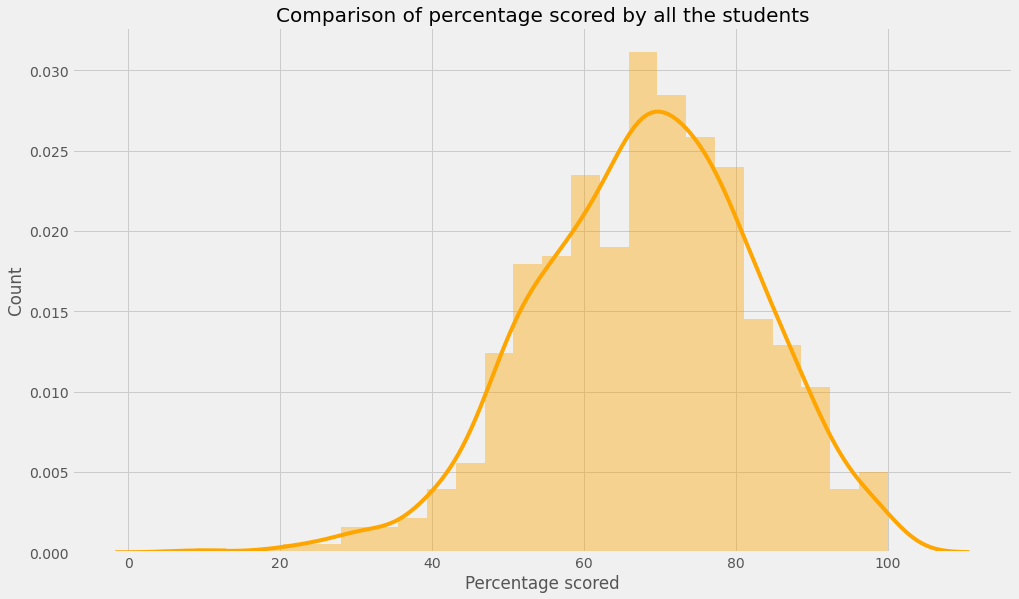

In [527]:
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [528]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'sports',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'attendance', 'total_score', 'percentage'],
      dtype='object')

In [529]:
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'



data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )

data['grades'].value_counts()

print(data.head(5))

   gender race/ethnicity parental level of education  sports  \
0  female        group B           bachelor's degree       1   
1  female        group C                some college       1   
2  female        group B             master's degree       1   
3    male        group A          associate's degree       2   
4    male        group C                some college       1   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   attendance  total_score  percentage grades  
0          71          218        73.0      B  
1          80          247        83.0      A  
2          85          278        93.0      

In [530]:
data.head()

,gender,race/ethnicity,parental level of education,sports,test preparation course,math score,reading score,writing score,attendance,total_score,percentage,grades
0,female,group B,bachelor's degree,1,none,72,72,74,71,218,73.0,B
1,female,group C,some college,1,completed,69,90,88,80,247,83.0,A
2,female,group B,master's degree,1,none,90,95,93,85,278,93.0,O
3,male,group A,associate's degree,2,none,47,57,44,18,148,50.0,D
4,male,group C,some college,1,none,76,78,75,66,229,77.0,B


In [531]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['sports'] = le.fit_transform(data['sports'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)


data['parental level of education'] = le.fit_transform(data['parental level of education'])

data['gender'] = le.fit_transform(data['gender'])

#data['math score'] = le.fit_transform(data['math score'])

#data['reading score'] = le.fit_transform(data['reading score'])

#data['writing score'] = le.fit_transform(data['writing score'])

#data['grades'] = le.fit_transform(data['grades'])

In [532]:
def func(sports, tpc, percentage, plofed):
  a = -1 * (sports) * 10 + tpc * 10 + percentage + plofed * 5
  if(a < 0):
    return 0
  if(a > 100):
    return 100

  return a
print(data.head(5))
data['percentage'] = data.apply(lambda x : func(x['sports'], x['test preparation course'], x['percentage'], x['parental level of education']), axis = 1)
data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )

print(data.head(5))

   gender  race/ethnicity  parental level of education  sports  \
0       0               2                            1       0   
1       0               3                            4       0   
2       0               2                            3       0   
3       1               1                            0       1   
4       1               3                            4       0   

   test preparation course  math score  reading score  writing score  \
0                        1          72             72             74   
1                        0          69             90             88   
2                        1          90             95             93   
3                        1          47             57             44   
4                        1          76             78             75   

   attendance  total_score  percentage grades  
0          71          218        73.0      B  
1          80          247        83.0      A  
2          85          278

In [533]:
data.head()

,gender,race/ethnicity,parental level of education,sports,test preparation course,math score,reading score,writing score,attendance,total_score,percentage,grades
0,0,2,1,0,1,72,72,74,71,218,88.0,A
1,0,3,4,0,0,69,90,88,80,247,100.0,O
2,0,2,3,0,1,90,95,93,85,278,100.0,O
3,1,1,0,1,1,47,57,44,18,148,50.0,D
4,1,3,4,0,1,76,78,75,66,229,100.0,O


In [534]:
data.shape

(1000, 12)

In [535]:
x = data.iloc[:,:11]
y = data.iloc[:,11]

print(x.shape)
print(y.shape)

(1000, 11)
(1000,)


In [536]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 11)
(750,)
(250, 11)
(250,)


In [537]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [538]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.51619619e-01 2.19009481e-01 2.06087760e-01 1.23842017e-01
 8.94375129e-02 6.48489926e-02 4.05975226e-02 2.03023407e-03
 1.48631469e-03 1.04054663e-03 4.23347689e-33]


In [539]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.5026666666666667
Testing Accuracy : 0.424


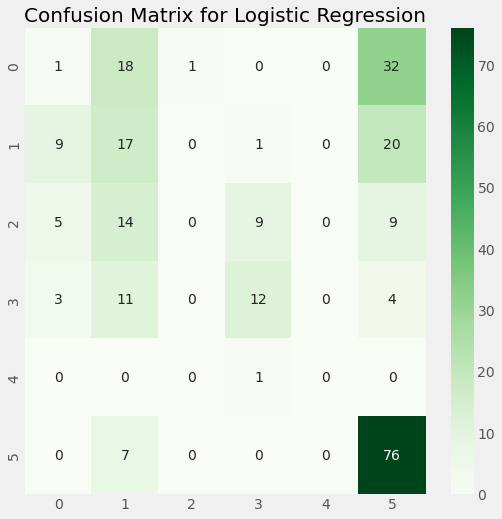

In [540]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [541]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.66


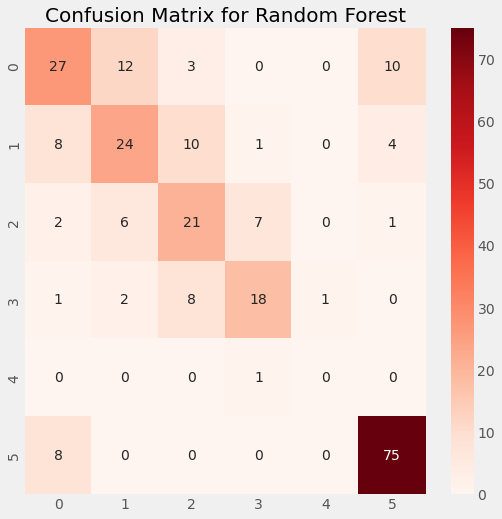

In [542]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

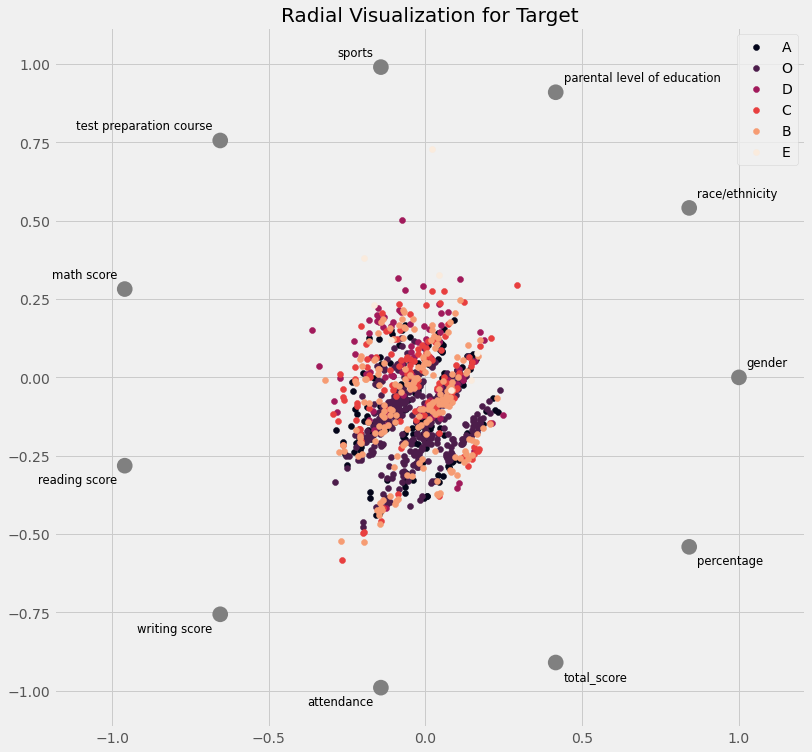

In [543]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

In [544]:
data.head()

,gender,race/ethnicity,parental level of education,sports,test preparation course,math score,reading score,writing score,attendance,total_score,percentage,grades
0,0,2,1,0,1,72,72,74,71,218,88.0,A
1,0,3,4,0,0,69,90,88,80,247,100.0,O
2,0,2,3,0,1,90,95,93,85,278,100.0,O
3,1,1,0,1,1,47,57,44,18,148,50.0,D
4,1,3,4,0,1,76,78,75,66,229,100.0,O


In [545]:
!pip install lightgbm
 
# Importing Required Library
import pandas as pd
import lightgbm as lgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [554]:
train = data[0:500]
test = data[500:]
 
# Separating the independent and target variable on both data set
x_train = train.drop(columns =['grades', 'race/ethnicity', 'math score', 'reading score', 'writing score', 'total_score', 'percentage'], axis = 1)
y_train = train['grades']
x_test = test.drop(columns =['grades', 'race/ethnicity', 'math score', 'reading score', 'writing score', 'total_score', 'percentage'], axis = 1)
y_test = test['grades']

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train, y_train)

print("Enter Values according to the dataset columns")
col = []
for i in x_train.columns:
  col.append(i)
l = []
list = []
for i in range(5):
  a = int(input())
  list.append(a)
l.append(list)
x_test = pd.DataFrame(l, columns=col)

pred = model.predict(x_test)
print(pred)


Enter Values according to the dataset columns
0
2
1
1
85
['D']
